In [43]:
# Importing modules
import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

4


(60000, 28, 28)

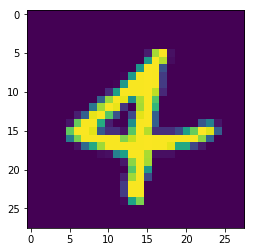

In [44]:
# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
imageIndex = 150
print(y_train[imageIndex]) 
plt.imshow(x_train[imageIndex])

x_train.shape

In [45]:
# Reshaping to 4-dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Converting to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('x_train new shape:', x_train.shape)
print('x_train Total Image : ', x_train.shape[0])
print('x_test Total Image : ', x_test.shape[0])
# print(y_test)

x_train new shape: (60000, 28, 28, 1)
x_train Total Image :  60000
x_test Total Image :  10000
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
# Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [47]:
#Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2119 - acc: 0.9365 - val_loss: 0.0729 - val_acc: 0.9777
Epoch 2/8
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0864 - acc: 0.9737 - val_loss: 0.0647 - val_acc: 0.9793
Epoch 3/8
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0591 - acc: 0.9813 - val_loss: 0.0581 - val_acc: 0.9819
Epoch 4/8
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0522 - val_acc: 0.9850
Epoch 5/8
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0379 - acc: 0.9877 - val_loss: 0.0622 - val_acc: 0.9816
Epoch 6/8
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0300 - acc: 0.9900 - val_loss: 0.0633 - val_acc: 0.9842
Epoch 7/8
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0272 - acc: 0.9906 - val_loss: 0.0576 - val_acc

In [48]:
# Evaluating Model
result = model.evaluate(x_test, y_test)
print('Test Loss : ', result[0])
print('Test Accuracy : {} %'.format(result[1]*100))

10000/10000 [==============================] - 7s 695us/step
Test Loss :  0.06278673161658625
Test Accuracy : 98.34 %


In [57]:
# Predicting image
# imageIndex = 5
# plt.imshow(x_test[imageIndex])
# prediction = model.predict(x_test[:4])
# print(prediction.argmax())
prediction = model.predict(x_test[:4])
print(prediction[3].argmax())

0


In [61]:
model.predict(x_test[1:2]).argmax()

2

In [63]:
model.predict(x_test[2].reshape(1,28,28,1)).argmax()

1